# 6.2 Exploring relationships

### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Data Cleaning
#### 3. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots

### 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Creating path 
path = r'/Users/monajafizada/Documents/DataAnalytics/A6 advanced analytics and dashboard design/Project Information'

In [3]:
# This command prompts matplotlib visuals to appear in the notebook.

%matplotlib inline

Data 1

In [4]:
# importing Covid data of deaths by sex, age and states
Covid_Deaths_by_sex_age_States = pd.read_csv(os.path.join(path, '02 Data', 'PreparedData', 'COVID-19_Death_Counts_by_Sex__Age__and_State.csv'), index_col = False)

In [5]:
matplotlib.__version__

'3.3.3'

### 2.  Data Cleaning

In [6]:
Covid_Deaths_by_sex_age_States.head()

,Unnamed: 0,Data as of,Start week,End Week,State,Sex,Age group,COVID-19 Deaths
0,0,08/12/2020,02/01/2020,08/08/2020,United States,All,Under 1 year,16.0
1,1,08/12/2020,02/01/2020,08/08/2020,United States,All,1-4 years,10.0
2,2,08/12/2020,02/01/2020,08/08/2020,United States,All,5-14 years,23.0
3,3,08/12/2020,02/01/2020,08/08/2020,United States,All,15-24 years,242.0
4,4,08/12/2020,02/01/2020,08/08/2020,United States,All,25-34 years,1133.0


In [7]:
# rename the column 
Covid_Deaths_by_sex_age_States = Covid_Deaths_by_sex_age_States.rename(columns={'Unnamed: 0':'No'})

In [8]:
Covid_Deaths_by_sex_age_States.dtypes

No                   int64
Data as of          object
Start week          object
End Week            object
State               object
Sex                 object
Age group           object
COVID-19 Deaths    float64
dtype: object

In [9]:
Covid_Deaths_by_sex_age_States.isnull().sum()

No                 0
Data as of         0
Start week         0
End Week           0
State              0
Sex                0
Age group          0
COVID-19 Deaths    0
dtype: int64

In [10]:
# finding duplicates
df_dups = Covid_Deaths_by_sex_age_States[Covid_Deaths_by_sex_age_States.duplicated()]

In [11]:
#no duplicates found
df_dups.shape

(0, 8)

### Mixed-Type Data:

In [12]:
for col in Covid_Deaths_by_sex_age_States.columns.tolist():
      weird = (Covid_Deaths_by_sex_age_States[[col]].applymap(type) != Covid_Deaths_by_sex_age_States[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (Covid_Deaths_by_sex_age_States[weird]) > 0:
        print (col)

# No mixed-type columns either! 

### 3.  Exploring Relationships 

### Correlations: 

In [12]:
# Create a correlation matrix using pandas
Covid_Deaths_by_sex_age_States.corr()

,No,COVID-19 Deaths
No,1.000000,-0.129326
COVID-19 Deaths,-0.129326,1.000000


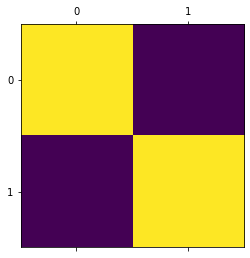

In [13]:
# Create a correlation heatmap using matplotlib

plt.matshow(Covid_Deaths_by_sex_age_States.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

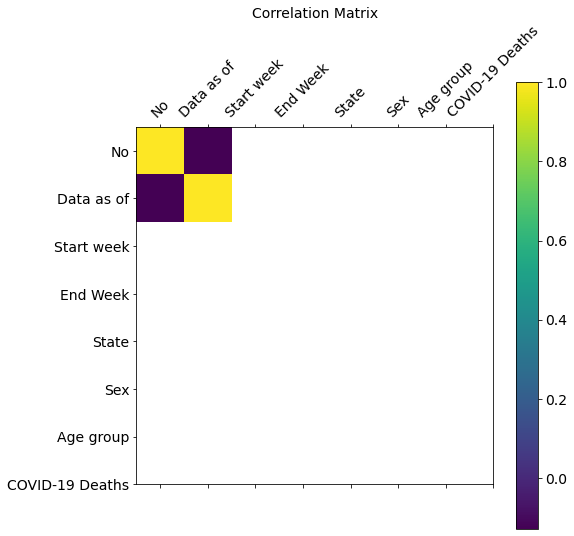

In [14]:
# Add labels, a legend and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(Covid_Deaths_by_sex_age_States.corr(), fignum=f.number) # type of plot
plt.xticks(range(Covid_Deaths_by_sex_age_States.shape[1]), Covid_Deaths_by_sex_age_States.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(Covid_Deaths_by_sex_age_States.shape[1]), Covid_Deaths_by_sex_age_States.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title


### Create a correlation heatmap using seaborn:

In [15]:
Covid_Deaths_by_sex_age_States.columns

Index(['No', 'Data as of', 'Start week', 'End Week', 'State', 'Sex',
       'Age group', 'COVID-19 Deaths'],
      dtype='object')

In [16]:
# Create a subset excluding the "Date" and "No" columns

sub = Covid_Deaths_by_sex_age_States[['State', 'Sex',
       'Age group', 'COVID-19 Deaths']]

In [17]:
sub

,State,Sex,Age group,COVID-19 Deaths
0,United States,All,Under 1 year,16.0
1,United States,All,1-4 years,10.0
2,United States,All,5-14 years,23.0
3,United States,All,15-24 years,242.0
4,United States,All,25-34 years,1133.0
...,...,...,...,...
1411,Puerto Rico,Female,75-84 years,0.0
1412,Puerto Rico,Female,85 years and over,0.0
1413,Puerto Rico,Female,All ages,11.0
1414,Puerto Rico,Unknown,All ages,0.0


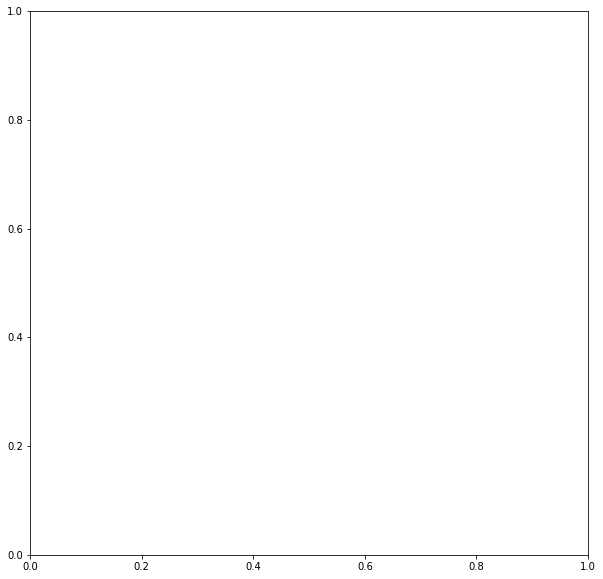

In [18]:
# Create a subplot with matplotlib. what it does is create an empty output, but this is okay-it's just to show the subplots.

f,ax = plt.subplots(figsize = (10,10))

In [19]:
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.

corr = sns.heatmap(sub.corr(), annot = True, ax =ax)

# The  'annot' argument allows the plot to place the correlation coefficients onto the heatmap.

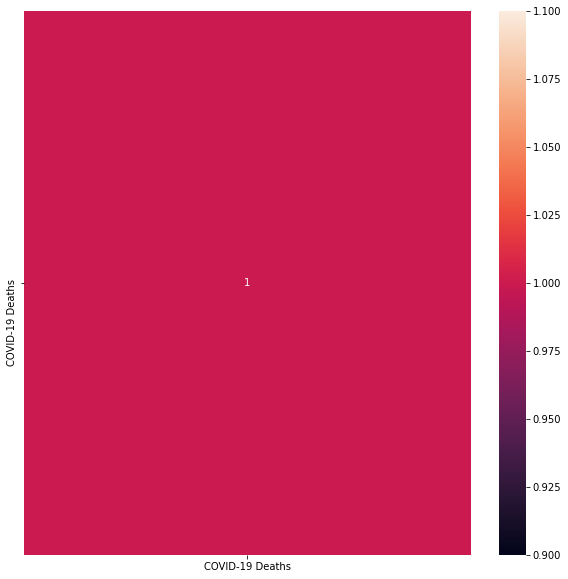

In [20]:
corr.figure

### Scatterplots

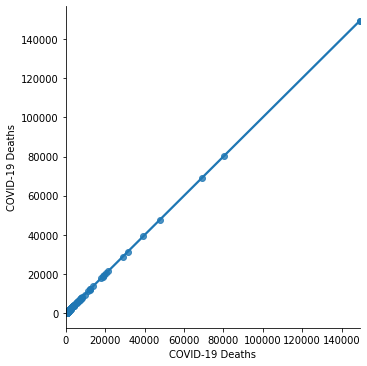

In [21]:
# Create a scatterplot for the "House age" and "price"

sns.lmplot(x ='COVID-19 Deaths', y = 'COVID-19 Deaths', data = Covid_Deaths_by_sex_age_States)

### Pair Plots:

In [22]:
# Keep only the variables you want to use in the pair plot

sub_2 = sub [['State', 'Sex','Age group', 'COVID-19 Deaths']]

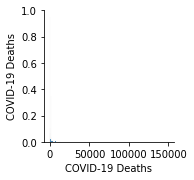

In [23]:
# Create a pair plot

g = sns.pairplot(sub_2)

### Categorical Plots:

#### Creating a categorical varibale that splots the "COVID-19 Deaths" columns into categories

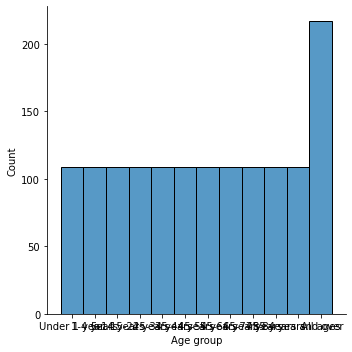

In [24]:
# Use a histogram to visualize the ditribution of the variables. This way, you can determine 
# sensible categories for the price ranges. you dont want to end up with too few observations 
# in any one of the categories. 
sns.displot(Covid_Deaths_by_sex_age_States['Age group'], bins = 40)

# Data 2

In [25]:
# importing Covid data of USA by cities
Covid_USA_City = pd.read_csv(os.path.join(path, '02 Data', 'PreparedData', 'covid_19_usa_city.csv'), index_col = False)

In [26]:
# creating a correlation matrix using pandas 

Covid_USA_City.corr()

,Unnamed: 0,Total Cases,New Cases,Total Deaths,Total Cases /1M pop,Total Tests
Unnamed: 0,1.000000,0.340047,0.082011,0.182626,0.699726,0.405766
Total Cases,0.340047,1.000000,0.361996,0.764083,0.588955,0.907988
New Cases,0.082011,0.361996,1.000000,0.179639,0.223804,0.246985
Total Deaths,0.182626,0.764083,0.179639,1.000000,0.485489,0.703353
Total Cases /1M pop,0.699726,0.588955,0.223804,0.485489,1.000000,0.506658
Total Tests,0.405766,0.907988,0.246985,0.703353,0.506658,1.000000


In [27]:
# rename column
Covid_USA_City = Covid_USA_City.rename(columns={'Unnamed: 0':'No'})

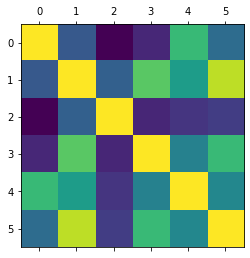

In [28]:
# Create a correlation heatmap using matplotlib

plt.matshow(Covid_USA_City.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

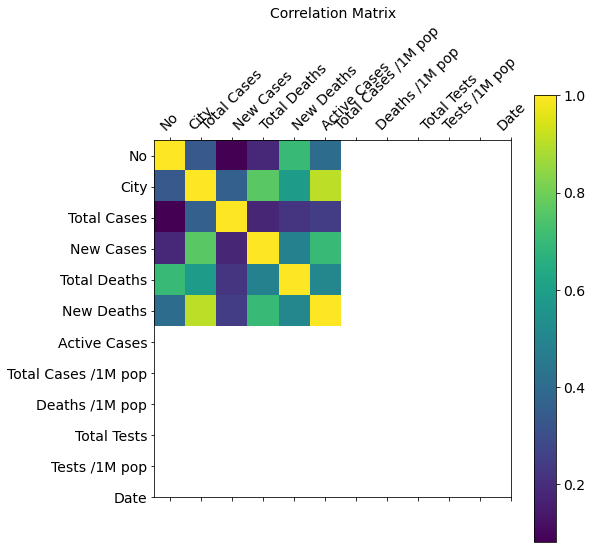

In [29]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(Covid_USA_City.corr(), fignum=f.number) # type of plot
plt.xticks(range(Covid_USA_City.shape[1]), Covid_USA_City.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(Covid_USA_City.shape[1]), Covid_USA_City.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

In [30]:
Covid_USA_City.columns

Index(['No', 'City', 'Total Cases', 'New Cases', 'Total Deaths', 'New Deaths',
       'Active Cases', 'Total Cases /1M pop', 'Deaths /1M pop', 'Total Tests',
       'Tests /1M pop', 'Date'],
      dtype='object')

In [31]:
# Create a subset excluding the "Date" and "No" columns

sub_2 = Covid_USA_City[['City', 'Total Cases', 'New Cases', 'Total Deaths', 'New Deaths',
       'Active Cases', 'Total Cases /1M pop', 'Deaths /1M pop', 'Total Tests',
       'Tests /1M pop',]]

In [32]:
sub_2

,City,Total Cases,New Cases,Total Deaths,New Deaths,Active Cases,Total Cases /1M pop,Deaths /1M pop,Total Tests,Tests /1M pop
0,New York,188694,7550.000000,9385.0,758,162220,9618.0,478.0,461601.0,"23,529"
1,New Jersey,61850,3699.000000,2350.0,167,58818,6964.0,265.0,126735.0,"14,269"
2,Michigan,23993,597.950107,1392.0,,22158,2410.0,140.0,76014.0,"7,634"
3,Massachusetts,22860,597.950107,686.0,,21445,3347.0,100.0,108776.0,"15,926"
4,Pennsylvania,22833,1029.000000,507.0,6,21676,1785.0,40.0,124890.0,"9,764"
...,...,...,...,...,...,...,...,...,...,...
8365,New Hampshire,8266,33.000000,439.0,,305,6079.0,323,304821.0,"224,181"
8366,Alaska,7824,103.000000,56.0,,3711,10695.0,77,457207.0,"624,988"
8367,Wyoming,5948,127.000000,50.0,,1107,10277.0,86,161417.0,"278,902"
8368,Maine,5391,54.000000,141.0,,572,4011.0,105,444931.0,"330,998"


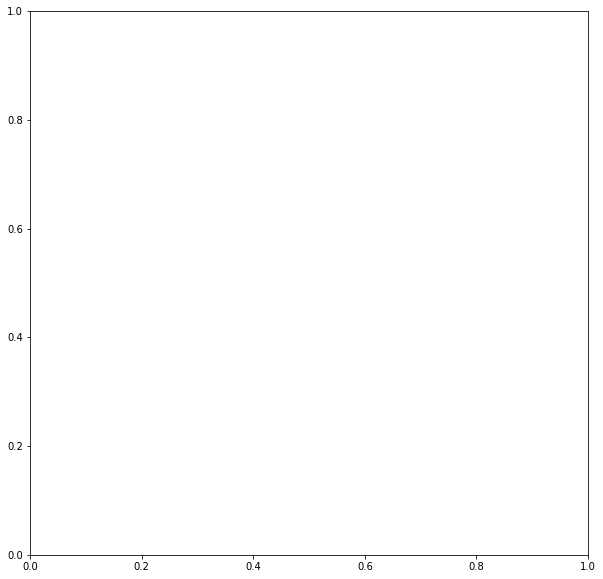

In [33]:
# Create a subplot with matplotlib. What it does is create an empty output, but this is okay—it's just to show the subplots.

f,ax = plt.subplots(figsize=(10,10))

In [34]:
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.

corr = sns.heatmap(sub_2.corr(), annot = True, ax = ax) 

# The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.


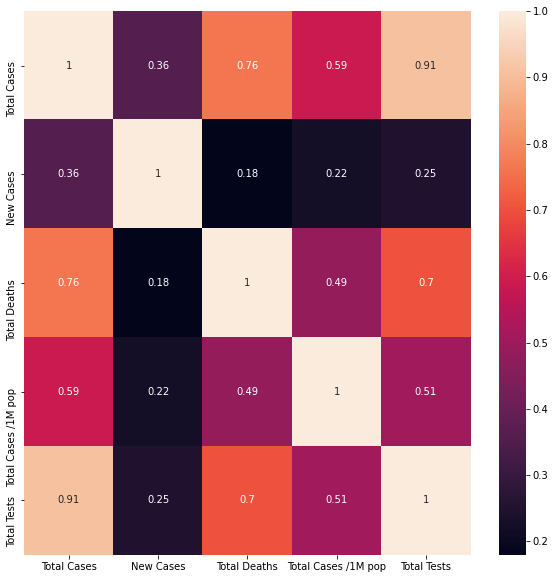

In [35]:
corr.figure

#The coefficient from 
#0.5 - 1 is    strong correlation
#0.3 - 0.5 is  moderate correlation
#0.1 - o.3 is  weak correlation
#0             no correlation 


### Scatterplots: 

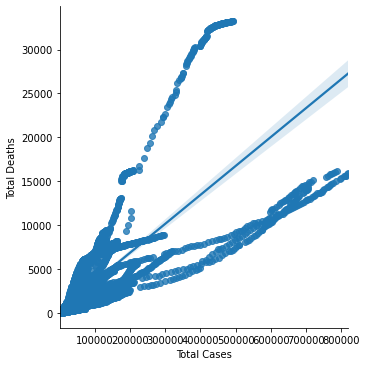

In [36]:
# Create a scatterplot for the "Total Cases" and "Total Deaths" columns in seaborn

sns.lmplot(x = 'Total Cases', y = 'Total Deaths', data = Covid_USA_City)

### Pair Plots:

In [37]:
# Keep only the variables you want to use in the pair plot

sub_2_1 = sub_2[['City', 'Total Cases', 'New Cases', 'Total Deaths', 'New Deaths',
       'Active Cases', 'Total Cases /1M pop', 'Deaths /1M pop', 'Total Tests',
       'Tests /1M pop',]]

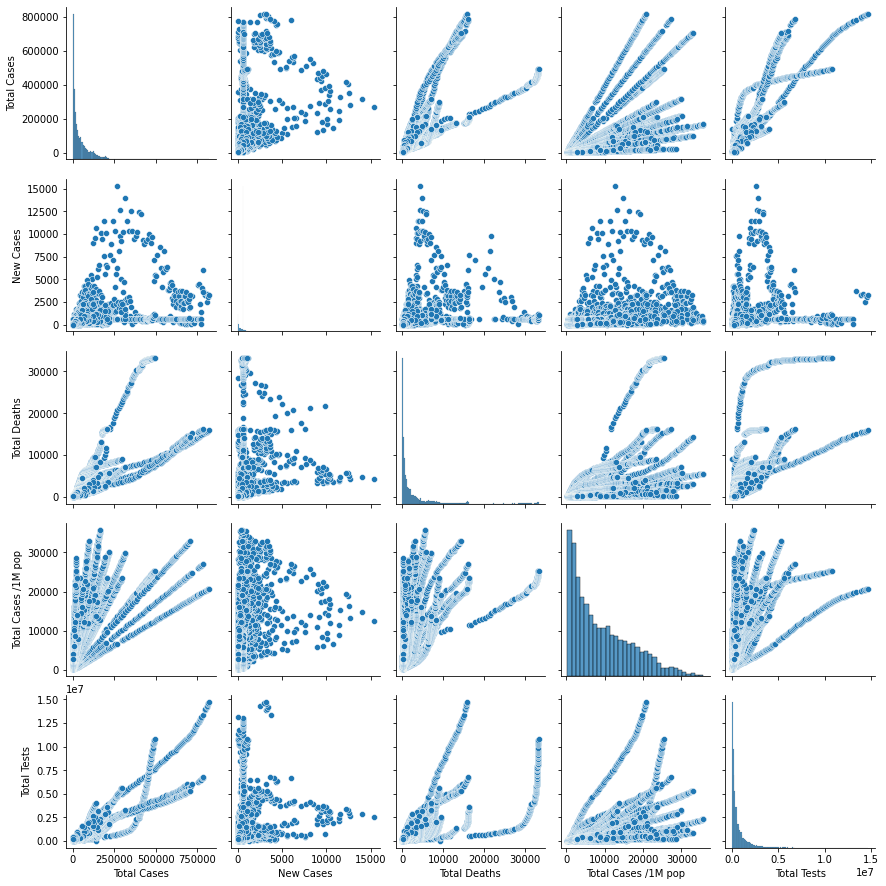

In [38]:
# Create a pair plot 

g = sns.pairplot(sub_2_1)

### Categorical Plots

#### Creating a categorical variable that splits the "Total Deaths" column into categories

/Users/monajafizada/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total Deaths', ylabel='Density'>

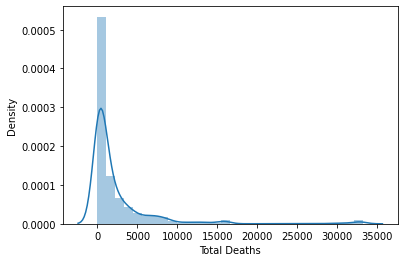

In [39]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You dont want to end up with too few observation in any of the categories. 

sns.distplot(Covid_USA_City['Total Deaths'], bins = 30)

In [40]:
Covid_USA_City.loc[Covid_USA_City['Total Deaths'] < 500, 'Deaths category'] = 'Low Deaths'

In [41]:
Covid_USA_City.loc[(Covid_USA_City['Total Deaths'] >= 500) & (Covid_USA_City['Total Deaths'] < 3000), 'Deaths category'] = 'Average Deaths'

In [42]:
Covid_USA_City.loc[Covid_USA_City['Total Deaths'] >= 3000 , 'Deaths category'] = 'High Deaths'

In [43]:
Covid_USA_City['Deaths category'].value_counts(dropna = False)

Low Deaths        3527
Average Deaths    3009
High Deaths       1834
Name: Deaths category, dtype: int64

In [44]:
Covid_USA_City.columns

Index(['No', 'City', 'Total Cases', 'New Cases', 'Total Deaths', 'New Deaths',
       'Active Cases', 'Total Cases /1M pop', 'Deaths /1M pop', 'Total Tests',
       'Tests /1M pop', 'Date', 'Deaths category'],
      dtype='object')

In [45]:

sns.set(style="ticks")


In [46]:
Covid_USA_City.head()

,No,City,Total Cases,New Cases,Total Deaths,New Deaths,Active Cases,Total Cases /1M pop,Deaths /1M pop,Total Tests,Tests /1M pop,Date,Deaths category
0,0,New York,188694,7550.000000,9385.0,758,162220,9618.0,478.0,461601.0,"23,529",04-12-2020,High Deaths
1,1,New Jersey,61850,3699.000000,2350.0,167,58818,6964.0,265.0,126735.0,"14,269",04-12-2020,Average Deaths
2,2,Michigan,23993,597.950107,1392.0,,22158,2410.0,140.0,76014.0,"7,634",04-12-2020,Average Deaths
3,3,Massachusetts,22860,597.950107,686.0,,21445,3347.0,100.0,108776.0,"15,926",04-12-2020,Average Deaths
4,4,Pennsylvania,22833,1029.000000,507.0,6,21676,1785.0,40.0,124890.0,"9,764",04-12-2020,Average Deaths


In [47]:
Covid_USA_City.columns

Index(['No', 'City', 'Total Cases', 'New Cases', 'Total Deaths', 'New Deaths',
       'Active Cases', 'Total Cases /1M pop', 'Deaths /1M pop', 'Total Tests',
       'Tests /1M pop', 'Date', 'Deaths category'],
      dtype='object')

In [48]:
# Create a subset and removing no and date

sub_2_C = Covid_USA_City[['City', 'Total Cases', 'New Cases', 'Total Deaths', 'New Deaths',
       'Active Cases', 'Total Cases /1M pop', 'Deaths /1M pop', 'Total Tests',
       'Tests /1M pop','Deaths category']]

In [49]:
Covid_USA_City.shape

(8370, 13)

In [50]:
sub_2_C_Filered = sub_2_C [11:1000]

In [51]:
sub_2_C_Filered

,City,Total Cases,New Cases,Total Deaths,New Deaths,Active Cases,Total Cases /1M pop,Deaths /1M pop,Total Tests,Tests /1M pop,Deaths category
11,Connecticut,11510,597.950107,494.0,,10966,3214.0,138.0,39831.0,"11,121",Low Deaths
12,Washington,10448,597.950107,494.0,,8880,1432.0,68.0,92999.0,"12,749",Low Deaths
13,Maryland,8225,531.000000,235.0,29,7534,1370.0,39.0,47238.0,"7,868",Low Deaths
14,Indiana,7928,493.000000,343.0,13,7571,1194.0,52.0,42489.0,"6,401",Low Deaths
15,Colorado,6893,597.950107,274.0,,6579,1246.0,50.0,34873.0,"6,305",Low Deaths
...,...,...,...,...,...,...,...,...,...,...,...
995,Louisiana,29140,429.000000,1993.0,23,9844,6248.0,427,168251.0,"36,077",Average Deaths
996,Connecticut,28764,597.950107,2339.0,,26360,8031.0,653,100257.0,"27,993",Average Deaths
997,Georgia,28215,719.000000,1172.0,6,27012,2740.0,114,168367.0,"16,350",Average Deaths
998,Maryland,24473,1001.000000,1251.0,59,21705,4076.0,208,125522.0,"20,908",Average Deaths


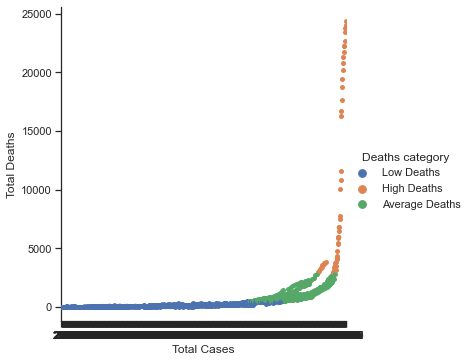

In [52]:
# Create a categorical plot in seaborn using the Deaths categories created above

g = sns.catplot(x="Total Cases", y="Total Deaths", hue="Deaths category", data = sub_2_C_Filered)